# Multilayer Perceptron

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
from sklearn import __version__
print(__version__)

1.3.0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.neural_network import MLPClassifier

In [23]:
def plot1(model, X, y, h=0.01, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8,4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)     
    
    my_dict = {-1:'r', 1:'b', 0:'g'}
    colors = np.vectorize(my_dict.get)(y)
    plt.scatter(X[:,0], X[:,1], s=15, c=colors, alpha=0.7)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid()
#    plt.show()

In [5]:
# function plot1 requires X to be numpy array
# so use X.values if X is a dataframe

In [6]:
df = pd.read_csv('moons.csv')
df

,feature1,feature2,label
0,0.161278,1.040189,0
1,-0.198249,0.650045,0
2,0.718082,-0.387594,1
3,1.982498,0.491790,1
4,1.475928,-0.443255,1
...,...,...,...
195,0.955191,-0.200922,0
196,1.729702,0.231600,1
197,0.415915,-0.104263,1
198,1.165601,-0.702048,1


In [7]:
y = df.label
X = df.drop(['label'],axis=1)

In [8]:
y.value_counts()

0    100
1    100
Name: label, dtype: int64

In [8]:
my_dict = {-1:'r', 1:'b', 0:'g'}
colors = np.vectorize(my_dict.get)(y)
colors

array(['g', 'g', 'b', 'b', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'g', 'g',
       'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'b', 'b',
       'b', 'b', 'b', 'g', 'g', 'g', 'b', 'g', 'g', 'b', 'g', 'g', 'g',
       'b', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'g', 'g', 'g', 'g', 'g',
       'b', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'g',
       'b', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'g', 'g', 'b', 'g', 'b',
       'b', 'b', 'g', 'b', 'g', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'b',
       'g', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'b', 'g', 'g', 'g', 'g',
       'g', 'b', 'b', 'b', 'g', 'b', 'g', 'g', 'g', 'b', 'g', 'b', 'b',
       'g', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'g', 'g', 'b', 'g', 'g',
       'b', 'b', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'b', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'b',
       'b', 'g', 'b', 'b', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'g

In [9]:
colors = np.where(y>0,'b','g')
colors

array(['g', 'g', 'b', 'b', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'g', 'g',
       'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'b', 'b',
       'b', 'b', 'b', 'g', 'g', 'g', 'b', 'g', 'g', 'b', 'g', 'g', 'g',
       'b', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'g', 'g', 'g', 'g', 'g',
       'b', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'g',
       'b', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'g', 'g', 'b', 'g', 'b',
       'b', 'b', 'g', 'b', 'g', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'b',
       'g', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'b', 'g', 'g', 'g', 'g',
       'g', 'b', 'b', 'b', 'g', 'b', 'g', 'g', 'g', 'b', 'g', 'b', 'b',
       'g', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'g', 'g', 'b', 'g', 'g',
       'b', 'b', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'b', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'b',
       'b', 'g', 'b', 'b', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'g

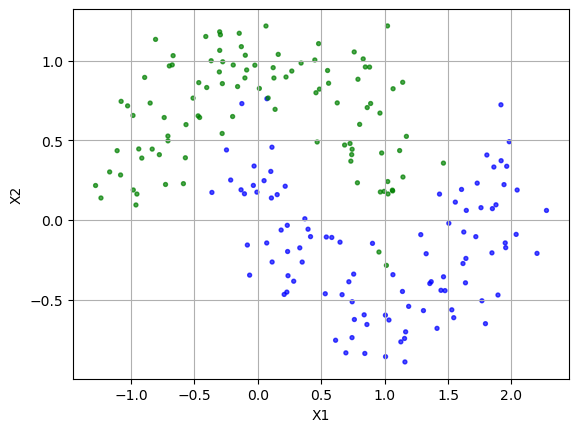

In [13]:
plt.figure()
plt.scatter(X.feature1, X.feature2, s=8, c=colors, alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,
                                                    random_state=42)
X_train = X_train.values
X_test = X_test.values

In [15]:
# One hidden layer with 10 nodes

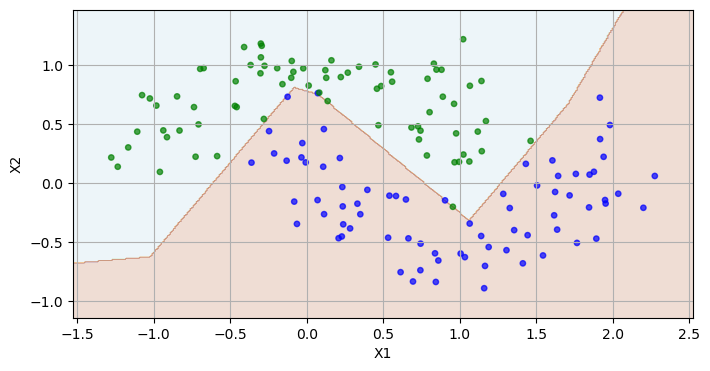

In [25]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
plot1(mlp,X_train, y_train)

In [14]:
# Use 100 nodes in hidden layer 

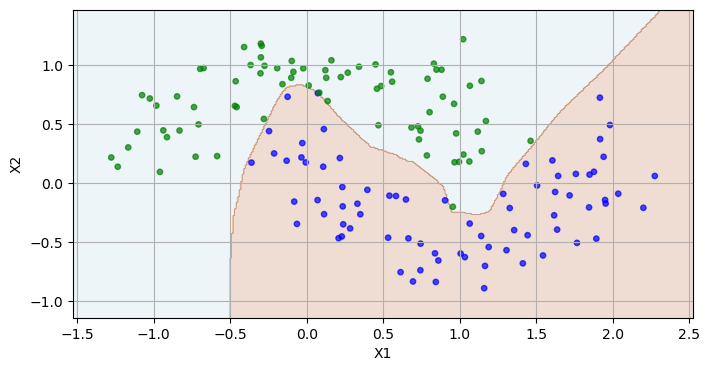

In [26]:
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[100])
mlp.fit(X_train, y_train)
plot1(mlp,X_train, y_train)

In [16]:
# Two hidden layers, with 10 nodes each

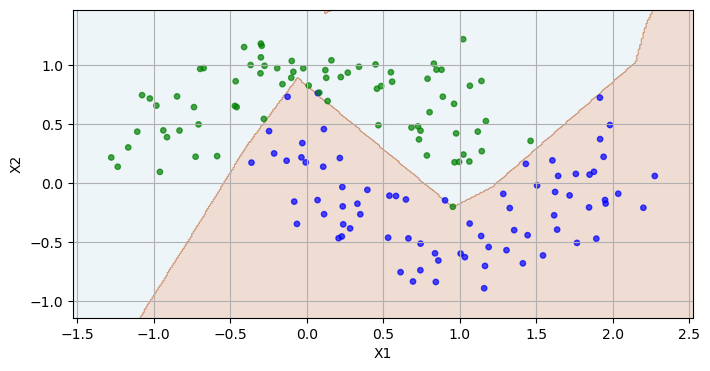

In [32]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
plot1(mlp,X_train, y_train)

In [33]:
# Two hidden layers, with 10 units each, with tanh activation func.

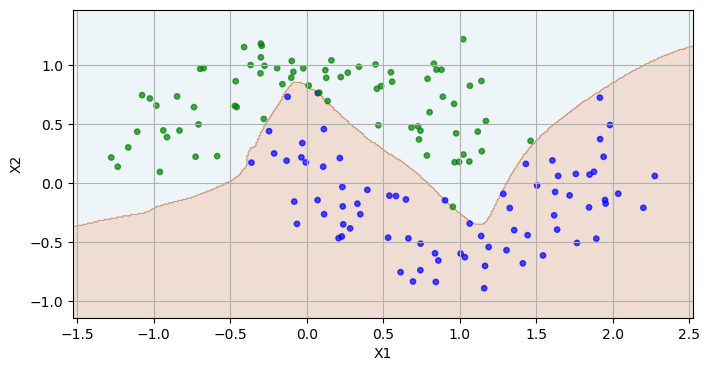

In [38]:
mlp = MLPClassifier(solver='lbfgs',activation='tanh', max_iter = 1000,
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
plot1(mlp,X_train, y_train)

In [19]:
# Test accuracy rate

In [35]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.98

In [36]:
pd.crosstab(y_test, y_pred,rownames = ['y_test'],colnames=['predictions'])

predictions,0,1
y_test,,
0,24,1
1,0,25


## Example 2 -Cancer data

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer

In [40]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
      cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train);

In [55]:
# Accuracy rate
mlp.score(X_test, y_test)

0.916083916083916

### Standardize the data

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Multilayer Perceptron

In [44]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train);

/Users/cam/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
mlp.score(X_test_scaled, y_test)

0.965034965034965

### Increase max_iter

In [46]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
mlp.score(X_test_scaled, y_test)

0.972027972027972

### Regularization on MLP

In [47]:
mlp = MLPClassifier(max_iter=1000, alpha=0.9, random_state=0)
mlp.fit(X_train_scaled, y_train)
mlp.score(X_test_scaled, y_test)

0.9790209790209791

In [48]:
y_pred = mlp.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9790209790209791

In [49]:
pd.crosstab(y_test, y_pred,rownames = ['y_test'],colnames=['predictions'])

predictions,0,1
y_test,,
0,51,2
1,1,89


In [58]:
df2 = pd.DataFrame()
df2['patient'] = y_test
df2['prediction'] = y_pred
df2

,patient,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,1,1
141,1,1


In [59]:
# find out which patients were mistakenly predicted 
aux = df2[df2.patient!=df2.prediction]
aux

,patient,prediction
92,1,0
108,0,1
109,0,1


### Weights

In [60]:
type(mlp.coefs_)

list

In [61]:
len(mlp.coefs_)

2

In [62]:
# weights from 30 inputs to 100 hidden nodes

In [63]:
mlp.coefs_[0].shape

(30, 100)

In [64]:
# weights from 100 hidden nodes to the ouput node

In [65]:
mlp.coefs_[1].shape

(100, 1)

In [67]:
# weights from 30 inputs to 100 hidden nodes

dfc = pd.DataFrame(mlp.coefs_[0])
dfc.columns = ['x' + str(x) for x in range(1,101)]
dfc.index = cancer.feature_names
np.round(dfc,4)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
mean radius,-0.0666,0.2167,0.0002,0.0000,-0.1716,-0.1724,-0.0144,0.1295,0.0000,0.0017,...,-0.1856,0.0001,0.0423,0.0000,0.0948,0.0162,0.0376,0.0000,-0.2276,-0.1928
mean texture,-0.2148,0.0662,-0.0000,-0.0000,0.1667,-0.1189,-0.0000,0.0777,-0.0009,-0.0777,...,-0.1800,0.0088,0.0941,0.0000,-0.0707,-0.0601,0.0979,0.0088,0.1583,0.1112
mean perimeter,0.0522,-0.1585,-0.0037,0.0089,0.0247,-0.2331,-0.0089,0.0432,-0.0229,-0.0521,...,-0.2212,-0.0175,0.0645,-0.0000,-0.1789,0.0257,0.1401,-0.0012,0.0320,-0.1997
mean area,-0.1934,0.0265,0.0000,0.0000,0.0830,0.1879,0.0000,-0.0991,0.0016,-0.0243,...,0.1973,-0.0000,-0.0175,0.0010,-0.0827,0.1939,0.1717,0.0000,0.0940,0.0944
mean smoothness,-0.1693,0.1882,-0.0000,0.0030,-0.0931,0.1523,0.0000,-0.2373,0.0097,-0.0407,...,-0.0334,-0.0000,-0.0427,-0.0023,-0.0253,-0.0505,0.0514,-0.0117,0.1882,0.1924
mean compactness,0.1589,-0.0196,-0.0000,0.0024,0.1134,-0.1178,0.0103,0.1277,0.0155,0.0006,...,-0.1209,0.0000,-0.0754,-0.0000,0.2156,-0.0448,0.0256,-0.0031,-0.0972,-0.1640
mean concavity,-0.0126,-0.1817,-0.0028,-0.0104,-0.0735,0.0677,-0.0015,-0.0542,-0.0000,-0.0035,...,0.0121,0.0000,-0.0091,-0.0006,-0.0628,-0.0263,-0.2159,-0.0000,-0.0582,0.0827
mean concave points,0.1279,-0.2572,-0.0000,-0.0058,-0.1201,0.2725,-0.0000,0.1377,-0.0004,-0.0022,...,-0.0830,0.0000,-0.0099,-0.0000,-0.1341,0.1036,0.0877,0.0000,0.1525,0.2494
mean symmetry,0.0892,-0.1357,-0.0000,-0.0000,-0.0468,0.0855,0.0133,0.1542,0.0000,-0.0480,...,0.0836,0.0050,0.0609,-0.0000,0.0665,-0.1160,-0.0762,0.0087,-0.2231,-0.1927
mean fractal dimension,-0.1391,-0.1794,-0.0026,-0.0000,-0.0579,0.1440,0.0025,-0.0990,-0.0003,-0.0045,...,0.1071,0.0000,-0.0425,0.0000,-0.0760,-0.1539,0.2042,-0.0056,0.1693,-0.0475


In [69]:
# weights from 100 hidden nodes to the ouput node

dfc = pd.DataFrame(mlp.coefs_[1])
dfc.index = ['x' + str(x) for x in range(1,101)]
dfc.columns = ['y']
np.round(dfc,4)

,y
x1,-0.1964
x2,0.1213
x3,0.0187
x4,0.0000
x5,-0.1035
...,...
x96,0.0111
x97,0.1944
x98,0.0123
x99,-0.1806
